# 1.Business Problem

A certain organization wants an early estimate of their employee churn out rate. So the HR department gathered the data regarding the employee’s salary hike and the churn out rate in a financial year. The analytics team will have to perform an analysis and predict an estimate of employee churn based on the salary hike. Build a Simple Linear Regression model with churn out rate as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

## 1.1.Business Objective

To develop a predictive model that estimates the employee churn rate based on salary hikes, enabling the organization to anticipate and mitigate employee attrition effectively

# 1.2Constraints:

Accuracy vs. Interpretability: Ensure a balance between model accuracy and simplicity.

Data Quality: Reliable predictions depend on accurate and complete data.

Timeliness: Deliver quick predictions for real-time or periodic planning.

Scalability: Adapt easily to future data updates.

Actionability: Provide insights to guide effective HR retention strategies.

In [2]:
#Import necessory Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data = pd.read_csv("emp_data.csv")
data

Salary_hike  Churn_out_rate
0         1580              92
1         1600              85
2         1610              80
3         1640              75
4         1660              72
5         1690              70
6         1706              68
7         1730              65
8         1800              62
9         1870              60

# 2.Work on each feature of the dataset to create a data dictionary as displayed in the image below:

In [4]:
data_dict = pd.DataFrame({
    'Feature': ['Churn_out_rate', 'Salary_hike'],
    'Data Type': [data['Churn_out_rate'].dtype, data['Salary_hike'].dtype],
    'Description': ['Time taken for delivery', 'Time taken for sorting items'],
    'Relevance': ['Relevant', 'Target Variable']
})
data_dict

Feature Data Type                   Description        Relevance
0  Churn_out_rate     int64       Time taken for delivery         Relevant
1     Salary_hike     int64  Time taken for sorting items  Target Variable

# 3.Data Pre-processing

## 3.1 Data Cleaning, Feature Engineering, etc

In [5]:
#Check for missing values
data.isnull().sum()

Salary_hike       0
Churn_out_rate    0
dtype: int64

In [6]:
#Check for duplicate rows
data.duplicated().sum()

0

In [7]:
#Check for invalid or zero values
(data ==0).sum()

Salary_hike       0
Churn_out_rate    0
dtype: int64

## 3.2 Outlier Treatment

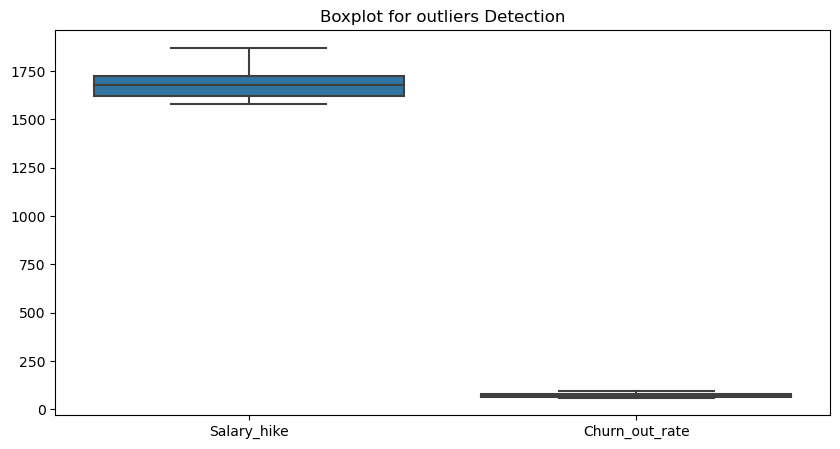

In [8]:
#Visulaize outliere using boxplot
plt.figure(figsize = (10,5))
sns.boxplot(data = data)
plt.title("Boxplot for outliers Detection")
plt.show()

In [9]:
data.skew()

Salary_hike       0.858375
Churn_out_rate    0.647237
dtype: float64

In [10]:
data.kurtosis()

Salary_hike       0.165793
Churn_out_rate   -0.328199
dtype: float64

# 4.Exploratory Data Analysis(EDA)

In [11]:
#Check the Data Structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Salary_hike     10 non-null     int64
 1   Churn_out_rate  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [12]:
data.describe()

Salary_hike  Churn_out_rate
count    10.000000       10.000000
mean   1688.600000       72.900000
std      92.096809       10.257247
min    1580.000000       60.000000
25%    1617.500000       65.750000
50%    1675.000000       71.000000
75%    1724.000000       78.750000
max    1870.000000       92.000000

## 4.2 Univariate anal

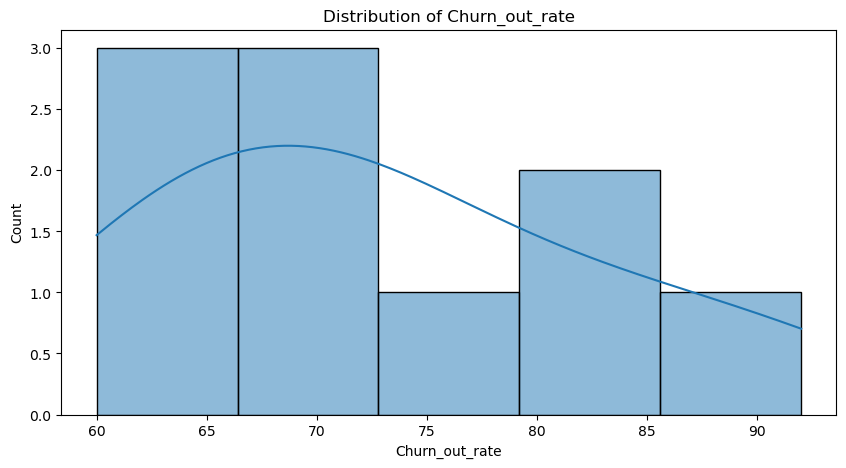

In [13]:
plt.figure(figsize =(10,5))
sns.histplot(data['Churn_out_rate'], kde = True)
plt.title('Distribution of Churn_out_rate')
plt.show()

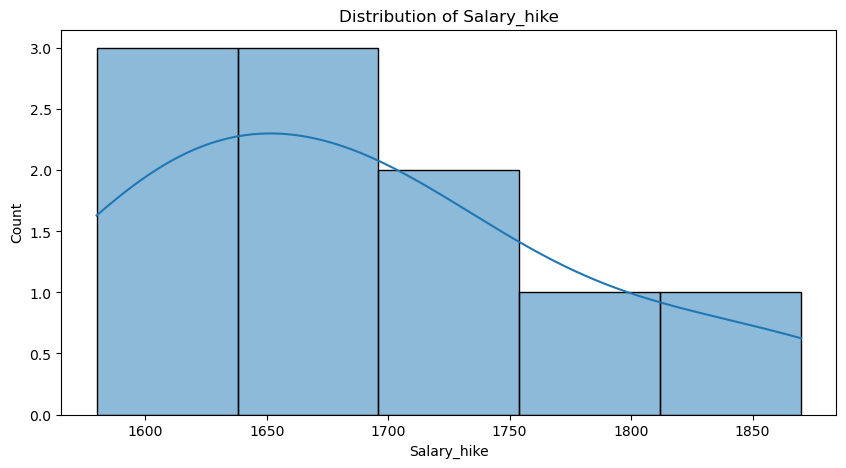

In [14]:
plt.figure(figsize =(10,5))
sns.histplot(data['Salary_hike'], kde = True)
plt.title('Distribution of Salary_hike')
plt.show()

In [15]:
#Set independent(x) and dependent(y) variable
X = data[['Salary_hike']]
y = data['Churn_out_rate']

## 4.3 Bivariate ananlysis

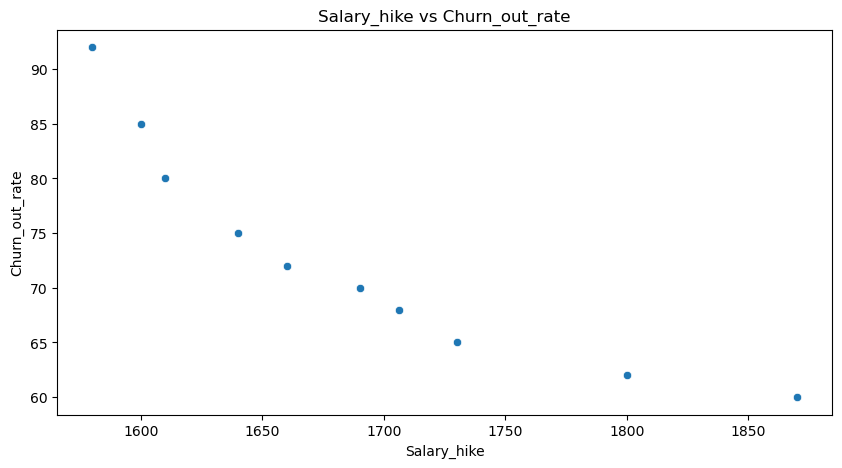

In [16]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'Salary_hike', y ='Churn_out_rate' ,data = data)
plt.title('Salary_hike vs Churn_out_rate')
plt.show()

In [17]:
#Splitting Data for Model Buliding
from sklearn.model_selection import train_test_split
X = data[['Salary_hike']]
y = data['Churn_out_rate']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# 5.1 Perform Simple Linear Regression

In [18]:
from sklearn.metrics import r2_score,mean_squared_error

In [19]:
import statsmodels.formula.api as smf
model = smf.ols('y~X', data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           0.000239
Time:                        15:21:48   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    244.3649     27.352      8.934      0.0

C:\Users\ADMIN\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [20]:
y_pred1 = model.predict(data[['Salary_hike']])

In [21]:
y_pred1 = model.predict(X)

In [22]:
r2 = r2_score(data['Churn_out_rate'], y_pred1)
r2

0.8312363099883754

In [23]:
lin2=LinearRegression()

In [27]:
lin2.fit(data[['Salary_hike']],data[['Churn_out_rate']])

LinearRegression()

In [29]:
y_pre=lin2.predict(data[['Salary_hike']])

In [30]:
r2_score(data['Churn_out_rate'],y_pre)

0.831236309988375

In [31]:
pol = PolynomialFeatures()

In [32]:
x_train=pol.fit_transform(data[['Salary_hike']])

In [33]:
y_tran_pol = pol.fit_transform(data[['Churn_out_rate']])

In [34]:
lin3 = LinearRegression()
lin3.fit(x_train,y_tran_pol)

LinearRegression()

In [35]:
y_pre3=lin3.predict(x_train)

In [36]:
r2_score(y_tran_pol,y_pre3)

0.9779181239641271

# 6.The benefits/impact of the solution

- Predict Employee Exit: Helps the company know in advance who might leave.
- Better Decisions: Guides HR to improve policies and keep employees happy.
- Save Money: Reduces costs by preventing frequent hiring and training.
- Happier Employees: Finds salary issues and helps improve job satisfaction.
- Faster Planning: Provides quick predictions for better workforce management.






